#Lab4

##import libs and connect to database

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [3]:


conn = psycopg2.connect(
                      host = host,
                      user = user,
                      password = pwd,
                      dbname = db
                        )

In [4]:
cur = conn.cursor()

#Q1

In [5]:
sql_q1 = """
        select * from gp32.student
        """

In [6]:
df = pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,nassirbm@dukes.jmu.edu,Brianna Nassiri,IA
1,s3@dukes.jmu.edu,student3,IA
2,s1@dukes.jmu.edu,student1,IA
3,s2@dukes.jmu.edu,student2,GS
4,s4@dukes.jmu.edu,student 4,IA
5,s5@dukes.jmu.edu,student 5,IA
6,s6@dukes.jmu.edu,student 6,IA
7,s7@dukes.jmu.edu,student 7,IA
8,s8@dukes.jmu.edu,student 8,IA
9,s9@dukes.jmu.edu,student 9,IA


#Q2

In [30]:
sql_q2 = """
        select gp32.professor.p_name,
        gp32.course.c_name
        from gp32.professor
        inner join gp32.course
        on gp32.professor.p_email = gp32.course.p_email
        
        """

In [32]:
df = pandas.read_sql_query(sql_q2,conn)
df[:10]

,p_name,c_name
0,Noel Hendrickson,Counterfactual Reasoning
1,Ronald Raab,Awareness and Understanding WMD
2,Kathleen Moore,Hacking for Diplomacy
3,Noel Hendrickson,Intro
4,new_p,new_c_name
5,new_p,Data Mining


#Q3

In [33]:
sql_q3 = """
      select c_number,
      count(c_number) as enrolled
      from gp32.enroll_list
      group by c_number
      order by enrolled desc
      """

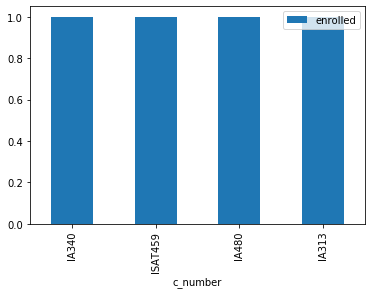

In [34]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

#Q4

In [35]:
sql_q4 = """
      select gp32.professor.p_name,
        count(gp32.course.c_name) as teaching_number
        from gp32.professor
        inner join gp32.course
        on gp32.professor.p_email = gp32.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

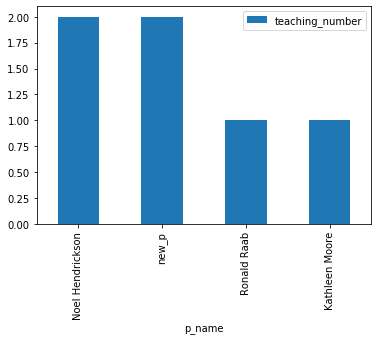

In [36]:
df = pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

#Q5

In [42]:
sql_q5_professor = """
                    insert into gp32.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                   """.format('new_d@jmu.edu','new_p','new_office')

In [43]:
cur.execute(sql_q5_professor)

IntegrityError: duplicate key value violates unique constraint "professor_office_key"
DETAIL:  Key (office)=(new_office) already exists.


In [44]:
conn.commit()

In [45]:
df= pandas.read_sql_query('select *from gp32.professor',conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Noel Hendrickson,engeo2204
1,moore8ka@jmu.edu,Kathleen Moore,ISAT116
2,raabrw@jmu.edu,Ronald Raab,ISAT156
3,new_p@jmu.edu,new_p,new_office


In [51]:
sql_q5_course = """
                    insert into gp32.course(c_number,c_name,room,p_email)
                    values('{}','{}','{}','{}')
                    """.format('ia_new','new_c_name','online','new_d@jmu.edu')

In [52]:
cur.execute(sql_q5_course)

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [54]:
conn.commit()

In [55]:
df= pandas.read_sql_query('select * from gp32.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA313,Counterfactual Reasoning,Online\n,hendrinx@jmu.edu
1,ISAT459,Awareness and Understanding WMD,online,raabrw@jmu.edu
2,IA480,Hacking for Diplomacy,online,moore8ka@jmu.edu
3,IA150,Intro,online,hendrinx@jmu.edu
4,ia_new,new_c_name,online,new_p@jmu.edu
5,IA340,Data Mining,Online,new_p@jmu.edu


#Q6

In [56]:
sql_q6_course = """
                  update gp32.course
                  set p_email = '{}'
                  where p_email = '{}'
                  """.format('new_d@jmu.edu','weixx@jmu.edu')

In [57]:
cur.execute(sql_q6_course)

In [58]:
#cur.execute('ROLLBACK')

In [59]:
conn.commit()

In [60]:
df= pandas.read_sql_query('select * from gp32.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA313,Counterfactual Reasoning,Online\n,hendrinx@jmu.edu
1,ISAT459,Awareness and Understanding WMD,online,raabrw@jmu.edu
2,IA480,Hacking for Diplomacy,online,moore8ka@jmu.edu
3,IA150,Intro,online,hendrinx@jmu.edu
4,ia_new,new_c_name,online,new_p@jmu.edu
5,IA340,Data Mining,Online,new_p@jmu.edu


In [61]:
sql_q6_professor = """
                     delete from gp32.professor
                     where p_email = '{}'
                     """.format('weixx@jmu.edu')

In [62]:
cur.execute(sql_q6_professor)

In [63]:
conn.commit()

In [64]:
df = pandas.read_sql_query('select * from gp32.professor',conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Noel Hendrickson,engeo2204
1,moore8ka@jmu.edu,Kathleen Moore,ISAT116
2,raabrw@jmu.edu,Ronald Raab,ISAT156
3,new_p@jmu.edu,new_p,new_office


close connection

In [65]:
cur.close()
conn.close()